In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


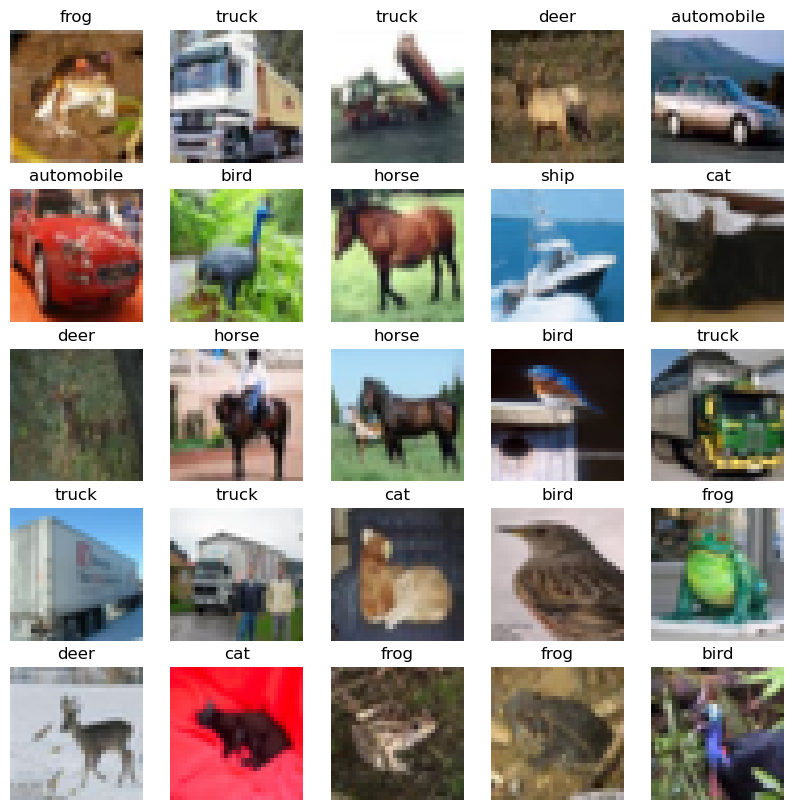

In [4]:
import pandas as pd
# Load the CIFAR-10 dataset
# Load CIFAR-10 data from CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Extract features and labels from the data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Display a few sample images from different classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Display a few sample images from different classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)

    # Reshape the flattened image back to its original shape
    img = X_train[i].reshape(32, 32, 3)

    plt.imshow(img)
    plt.title(classes[y_train[i]])
    plt.axis("off")
plt.show()


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

y_train = y_train.flatten()
y_test = y_test.flatten()



In [5]:
# Build a deeper model with Batch Normalization and Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

2023-11-15 22:35:28.156607: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-15 22:35:28.156852: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-15 22:35:28.157259: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-15 22:35:28.157817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-15 22:35:28.158829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
epochs = 10
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)



Epoch 1/10


2023-11-15 22:35:33.760397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 2.1404 - accuracy: 0.2385 - val_loss: 1.8980 - val_accuracy: 0.3171
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9722 - accuracy: 0.2828 - val_loss: 1.8833 - val_accuracy: 0.3241
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9479 - accuracy: 0.2917 - val_loss: 1.8805 - val_accuracy: 0.3349
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9401 - accuracy: 0.3026 - val_loss: 1.8741 - val_accuracy: 0.3351
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9439 - accuracy: 0.3011 - val_loss: 1.8547 - val_accuracy: 0.3492
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9329 - accuracy: 0.3068 - val_loss: 1.8597 - val_accuracy: 0.3409
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9311 - accuracy: 0.3077 - val_loss: 1.8467 - val_accura

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



313/313 [==============================] - 1s 4ms/step - loss: 1.8446 - accuracy: 0.3568
Test Accuracy: 35.68%


313/313 [==============================] - 1s 3ms/step


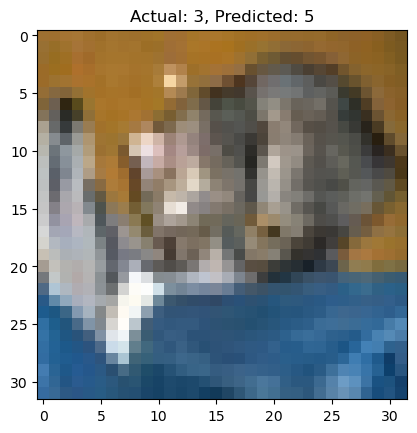

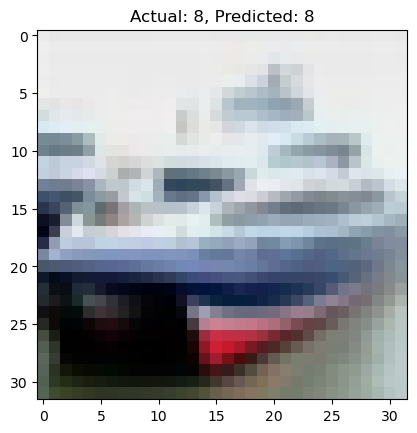

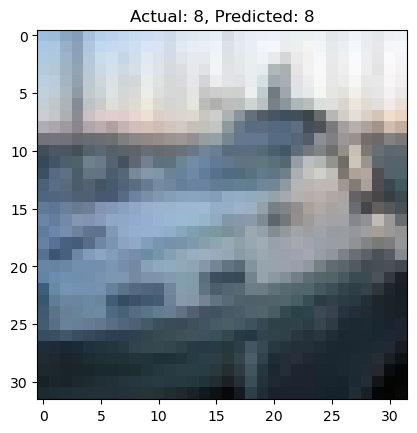

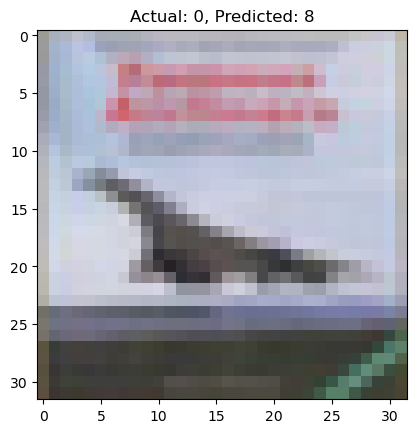

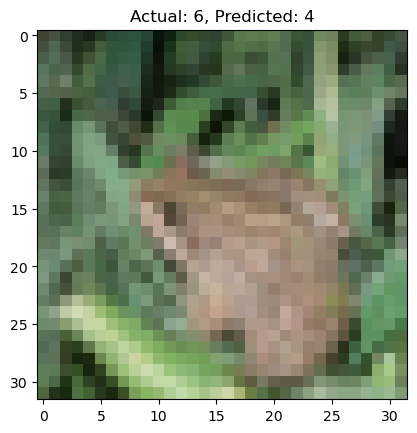

In [8]:
# Predictions
predictions = model.predict(X_test)

# Function to display actual and predicted labels with images
def display_actual_vs_predicted(index):
    actual_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    plt.imshow(X_test[index].reshape(32, 32, 3))
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()
# Display a few examples
for i in range(5):
    display_actual_vs_predicted(i)



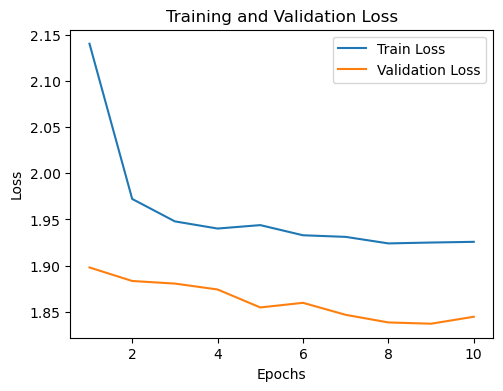

In [9]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), H.history['loss'], label='Train Loss')
plt.plot(range(1, epochs + 1), H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



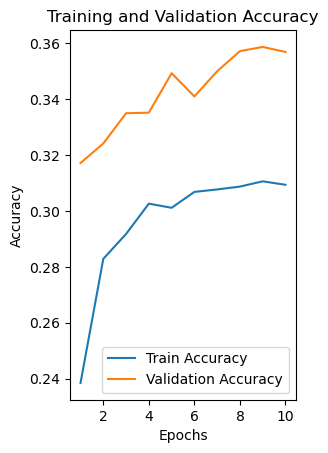

In [10]:
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), H.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, epochs + 1), H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
